<a href="https://colab.research.google.com/github/nayun12/Tobigs_17/blob/main/wk2_optimization_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

\# Tobig's 17기 2주차 Optimization 과제

-박나윤

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Tobigs/17기 2주차 Optimization 강의 자료/assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

Train Data와 Test Data를 3:1 로 분할하였다.
그 결과 Train Data의 길이는 150, Test Data의 길이는 50과 같다. 

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [11]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [12]:
# parameter 개수
N = len(X_train.loc[0])

In [13]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.20373927, 0.08097839, 0.8774461 ])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [14]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i] * parameters[i]
    return z

## Logistic Function

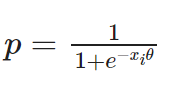

In [15]:
def logistic(X, parameters):
    z = dot_product(X,parameters)
    p = 1 / (1+np.exp(-z))    
    return p

In [16]:
logistic(X_train.iloc[1], parameters)

0.5837845116657402

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

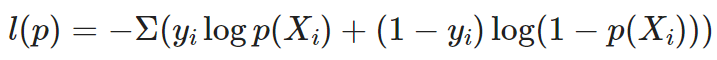

In [17]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)
    loss = (y * np.log(p) + (1 - y) * np.log(1-p))
    return -loss

In [18]:
def mse_i(X, y, parameters):
    y_hat = np.dot(X, parameters.T)
    loss = ((y - y_hat)**2) / 2
    return loss

In [19]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X, y, parameters)
    loss = loss / n #loss 평균값으로 계산
    return loss

In [20]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.036703748201877

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

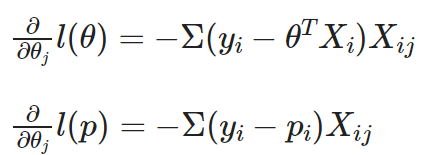

In [21]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = np.dot(X, parameters.T)
        gradient = (y - y_hat) * X[j]
    else:
        p = logistic(X, parameters)
        gradient = (y - p) * X[j]
    return -gradient


In [22]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.12900690507789123

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [23]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)
    
    return gradients

In [24]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[38.96517678288225, 5.239330883141548, 43.56128017670672]

## mini-batch
인덱스로 미니 배치 나누기

In [25]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: batch_size는 X_train 데이터를 적절한 몇 개의 그룹으로 나누어 학습을 진행하기 위해, 한 번 학습할 때 얼만큼의 데이터를 활용할 것인지를 정하는 하이퍼파라미터이다. batch_size의 설정은 1부터 X_train의 크기 만큼으로 가능한데, 이 수치는 한 번 학습될 때 활용되는 데이터의 크기이다. 만약 batch_size가 1이라면, 한 번에 1개씩의 데이터만을 활용하여 학습을 진행하므로 X_train 크기 만큼 학습을 진행하게 된다. 한편 batch_size가 X_train의 크기와 같다면, 한 번에 모든 데이터를 활용하여 학습하고 학습이 종료될 것이다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [26]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate / n
    
    parameters -= gradients
    return parameters

In [27]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.20114159, 0.0806291 , 0.87454202])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch:  
- num_epoch:

<br>

BGD: 학습 한 번에 모든 데이터셋에 대해 기울기를 구하는 방식

SGD: 학습 한 번에 임의의 1개 데이터에 대해서만 기울기를 구하는 방식

MGD: 학습 한 번에 데이터셋의 일부에 대해서만 기울기를 구하는 방식

<br>


batch_size에 따른 경사하강법의 종류를 적어주세요

batch_size=1 -> SGD

batch_size=k -> MGD

batch_size=whole -> BGD 

In [28]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [29]:
new_param_bgd = gradient_descent(X_train, y_train, batch_size = X_train.shape[0])
new_param_bgd

epoch: 0  loss: 0.9289308311080505  params: [0.68113813 0.24545923 0.31212412]  gradients: [0.038195073293142645, -0.0017787509239835053, 0.020023054097876254]
epoch: 100  loss: 0.4587110836947903  params: [-0.79571836  0.83699537 -0.758044  ]  gradients: [0.004274065378773387, -0.006387468021044204, 0.006555603793049864]
epoch: 200  loss: 0.3942713834196306  params: [-1.02781336  1.37734218 -1.29410109]  gradients: [0.0013644463057392666, -0.004554070487773949, 0.004454954452105005]
epoch: 300  loss: 0.3628136581353069  params: [-1.13565714  1.77033963 -1.67705052]  gradients: [0.0008993565922392309, -0.00341046569125611, 0.0033108312566773445]
epoch: 400  loss: 0.3444507703973669  params: [-1.21594382  2.07225611 -1.96922335]  gradients: [0.0007251739994887698, -0.00268524911584985, 0.0025903058632073778]
epoch: 500  loss: 0.33269164599076767  params: [-1.28244348  2.31437859 -2.20215413]  gradients: [0.0006117129056224845, -0.0021909397328815088, 0.002102128626086739]
epoch: 600  lo

array([-1.50067299,  3.06574297, -2.9169557 ])

In [30]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size = 1)
new_param_sgd

epoch: 0  loss: 0.2826849103590931  params: [-0.86486782  1.00389192 -1.13731409]  gradients: [0.025481195448320195, 0.013866890934926136, 0.01792833320716883]
epoch: 100  loss: 0.07736675291005347  params: [-1.93032527  4.17501832 -4.06769005]  gradients: [0.007538547036847622, 0.004102484507832145, 0.005304051901671245]
epoch: 200  loss: 0.0773626655248139  params: [-1.9303681   4.1751431  -4.06780374]  gradients: [0.0075381595221151905, 0.00410227362194411, 0.0053037792498932]
epoch: 300  loss: 0.07736266518361752  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489767166, 0.004102273604340285, 0.005303779227133429]
epoch: 400  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 500  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 600  loss: 0.077

array([-1.9303681 ,  4.17514311, -4.06780375])

In [31]:
new_param_mgd = gradient_descent(X_train, y_train, batch_size = 32)
new_param_mgd

epoch: 0  loss: 1.002701321852839  params: [0.08926571 0.57151009 0.53724639]  gradients: [0.02702497690464143, 0.02331553076020904, 0.05084159762007341]


array([-0.62121797,  0.5716753 , -0.40404543])

### Predict Label

In [32]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [33]:
from sklearn.metrics import *

In [34]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 4,  6]])

In [35]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.88


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [36]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [37]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [38]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.40852655, 2.57193838])

In [39]:
#경사하강법
new_param = gradient_descent(X, y, model='linear')
new_param

epoch: 0  loss: 1.753292926539518  params: [1.1397201 0.780231 ]  gradients: [0.03609488569865823, -0.03593033540755083]
epoch: 100  loss: 0.998526917059197  params: [0.26163708 2.75681466]  gradients: [0.05382574967104133, -0.0004613696413915476]
epoch: 200  loss: 0.9983388338563253  params: [0.26129221 2.75746577]  gradients: [0.05382521886830297, -0.00045301526030028976]
epoch: 300  loss: 0.9983387696632411  params: [0.26129209 2.757466  ]  gradients: [0.05382521868711238, -0.0004530124085160292]
epoch: 400  loss: 0.9983387696413288  params: [0.26129209 2.757466  ]  gradients: [0.05382521868705054, -0.00045301240754256716]
epoch: 500  loss: 0.9983387696413212  params: [0.26129209 2.757466  ]  gradients: [0.05382521868705053, -0.00045301240754222667]
epoch: 600  loss: 0.9983387696413212  params: [0.26129209 2.757466  ]  gradients: [0.05382521868705053, -0.00045301240754222667]
epoch: 700  loss: 0.9983387696413212  params: [0.26129209 2.757466  ]  gradients: [0.05382521868705053, -0.0

array([0.26129209, 2.757466  ])

In [40]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

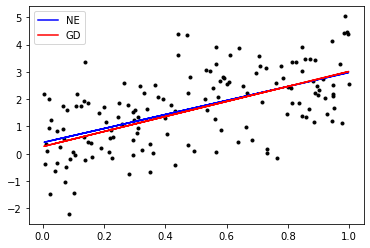

In [41]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()

# XGBRegressor bayesian-optimization

In [45]:
import scipy.optimize as optimize
!pip install --target=$my_path bayesian-optimization
from bayes_opt import BayesianOptimization


In [51]:
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb

# MAPE Metric
def mean_absolute_percentage_error(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# 탐색 대상 함수 (XGBRegressor)
def XGB_cv(max_depth,learning_rate, n_estimators, gamma
            ,min_child_weight, subsample
            ,colsample_bytree, silent=True, nthread=-1):

    # 모델 정의
    model = xgb.XGBRegressor(max_depth=int(max_depth),
                            learning_rate=learning_rate,
                            n_estimators=int(n_estimators),
                            gamma=gamma,
                            min_child_weight=min_child_weight,
                            subsample=subsample,
                            colsample_bytree=colsample_bytree, 
                            nthread=nthread
                            )
    # 모델 훈련
    model.fit(X_train, y_train)

    # 예측값 출력
    y_pred= model.predict(X_test)

    # 각종 metric 계산
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    # 오차 최적화로 사용할 metric 반환
    return r2

In [53]:
#  bayesian-optimization 라이브러리의 BayesianOptimization 클래스 import
from bayes_opt import BayesianOptimization
import numpy as np

# 실험해보고자하는 hyperparameter 집합
pbounds = {'max_depth': (3, 7),
            'learning_rate': (0.01, 0.2),
            'n_estimators': (5000, 10000),
            'gamma': (0, 100),
            'min_child_weight': (0, 3),
            'subsample': (0.5, 1),
            'colsample_bytree' :(0.2, 1)
            }

# Bayesian optimization 객체 생성
# f : 탐색 대상 함수, pbounds : hyperparameter 집합
# verbose = 2 항상 출력, verbose = 1 최댓값일 때 출력, verbose = 0 출력 안함
# random_state : Bayesian Optimization 상의 랜덤성이 존재하는 부분을 통제 
bo=BayesianOptimization(f=XGB_cv, pbounds=pbounds, verbose=2, random_state=1 )    

# 메소드를 이용해 최대화 과정 수행
# init_points :  초기 Random Search 갯수
# n_iter : 반복 횟수 (몇개의 입력값-함숫값 점들을 확인할지! 많을 수록 정확한 값을 얻을 수 있다.)
# acq : Acquisition Function들 중 Expected Improvement(EI) 를 사용
# xi : exploration 강도 (기본값은 0.0)
bo.maximize(init_points=2, n_iter=10, acq='ei', xi=0.01)

# ‘iter’는 반복 회차, ‘target’은 목적 함수의 값, 나머지는 입력값을 나타냅니다. 
# 현재 회차 이전까지 조사된 함숫값들과 비교하여, 현재 회차에 최댓값이 얻어진 경우, 
# bayesian-optimization 라이브러리는 이를 자동으로 다른 색 글자로 표시하는 것을 확인할 수 있습니다

# 찾은 파라미터 값 확인
print(bo.max)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
[07:37:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


|  1        | -0.04301  |  0.5336   |  72.03    |  0.01002  |  4.209    |  0.4403   |  5.462e+0 |  0.5931   |
[07:37:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


|  2        | -0.04207  |  0.4764   |  39.68    |  0.1124   |  4.677    |  2.056    |  6.022e+0 |  0.9391   |
[07:37:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


|  3        | -0.04309  |  0.6733   |  41.85    |  0.1345   |  3.371    |  2.795    |  6.022e+0 |  0.9493   |
[07:37:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


|  4        | -0.04347  |  0.8121   |  10.95    |  0.1092   |  6.073    |  2.061    |  5.665e+0 |  0.601    |
[07:37:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


|  5        | -0.02713  |  0.972    |  6.63     |  0.01992  |  5.446    |  1.737    |  9.304e+0 |  0.7013   |
[07:37:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


|  6        | -0.03934  |  0.9106   |  18.97    |  0.04206  |  6.594    |  2.846    |  9.287e+0 |  0.6635   |
[07:38:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


|  7        | -0.0423   |  0.6633   |  16.77    |  0.1443   |  3.372    |  1.505    |  9.316e+0 |  0.9553   |
[07:38:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


|  8        |  0.009389 |  0.7361   |  5.031    |  0.05488  |  3.791    |  1.871    |  9.297e+0 |  0.5335   |
[07:38:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


|  9        |  0.04269  |  0.723    |  4.026    |  0.1385   |  4.154    |  1.298    |  9.292e+0 |  0.948    |
[07:38:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


|  10       | -0.04151  |  0.5386   |  5.152    |  0.07308  |  5.486    |  1.332    |  9.284e+0 |  0.9682   |
[07:38:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


|  11       |  0.04173  |  0.8386   |  4.601    |  0.07387  |  4.655    |  1.65     |  9.294e+0 |  0.6387   |
[07:38:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
|  12       |  0.3147   |  0.2658   |  0.843    |  0.1685   |  5.718    |  0.6839   |  9.29e+03 |  0.6688   |
{'target': 0.31474291590046344, 'params': {'colsample_bytree': 0.26576731529566366, 'gamma': 0.8430419661490385, 'learning_rate': 0.16845325872457734, 'max_depth': 5.718320649403493, 'min_child_weight': 0.6838853118379273, 'n_estimators': 9289.851501706646, 'subsample': 0.6687764759180062}}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
